In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [27]:
def lag_covariance_time_series(x, t0, n, lag):
    series_1 = x[t0:t0+n]
    series_1 = series_1 - np.mean(series_1)
    series_2 = x[t0+lag:t0+lag+n]
    series_2 = series_2 - np.mean(series_2)
    var_1 = np.var(series_1)
    var_2 = np.var(series_2)
    cov_12 = np.mean(series_1 * series_2)
    return var_1, var_2, cov_12

In [28]:
data = pd.read_csv('SP500.csv', parse_dates=['observation_date'])
data.dropna(inplace=True)
t = (data['observation_date'] - data['observation_date'].iloc[0]).values.astype('timedelta64[D]')
x = data['SP500'].values
r = np.log10(x / x[0])
regr = stats.linregress(t.astype(float), r)
z = r - regr.intercept - regr.slope * t.astype(float)

In [37]:
n = 5
num_lags = 7
mutual  = np.zeros((len(z), num_lags))
vmutual = np.zeros((len(z), num_lags))
for t0 in np.arange(0, len(z)):
    if(t0 + n >= len(z)):
        vmutual[t0, :] = np.nan
        mutual[t0, :] = np.nan
        break

    for lag_mul in np.arange(1, 1+num_lags):
        lag = lag_mul * n
        if(t0 + n + lag >= len(z)):
            vmutual[t0, lag_mul - 1] = np.nan
            mutual[t0, lag_mul - 1] = np.nan
            break
        var_1, var_2, cov_12 = lag_covariance_time_series(z, t0, n, lag)
        vmutual[t0, lag_mul - 1] = (cov_12**2) / (var_1 * var_2)
        mutual[t0, lag_mul - 1] = 0.5*np.log((var_1 * var_2) / (var_1 * var_2 - cov_12**2))

/tmp/ipykernel_10328/2671179937.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.nanargmin(vmutual/mutual, axis=0))


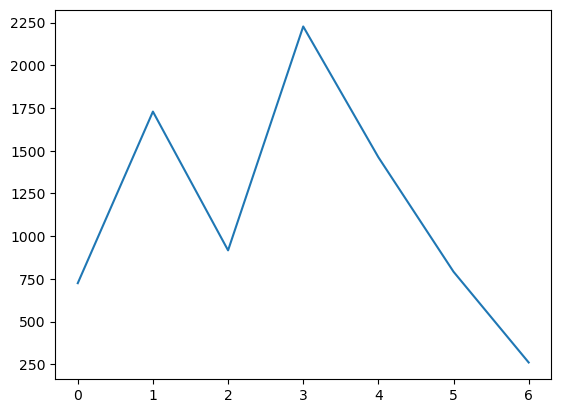

In [42]:
plt.plot(np.nanargmin(vmutual/mutual, axis=0))

/tmp/ipykernel_10328/1948539530.py:1: RuntimeWarning: invalid value encountered in divide
  plt.scatter(1+np.arange(0, mutual.shape[1]), np.nanmean(vmutual/mutual, axis=0))


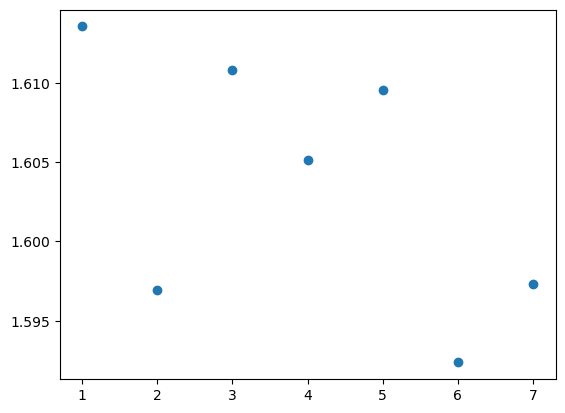

In [38]:
plt.scatter(1+np.arange(0, mutual.shape[1]), np.nanmean(vmutual/mutual, axis=0))